In [48]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [49]:
train_file_path = "./files/train.csv"
train = pd.read_csv(train_file_path)
print(train.shape) # (lines, columns)
train.head(3) # first 3 elements

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [57]:
missing_data = train.isnull().sum()
result = missing_data[missing_data > 0].sort_values(ascending=False)
result

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

### Passo 11
Remover coluna irrelevante ID

In [ ]:
train = train.drop('Id', axis=1)
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
train.info()
# Podemos observar a coluna count e ver que algumas colunas tem poucos preenchimentos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# House prices distribution. 50% of the houses are <= 163000.00
print(train['SalePrice'].describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_9752/3893001673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

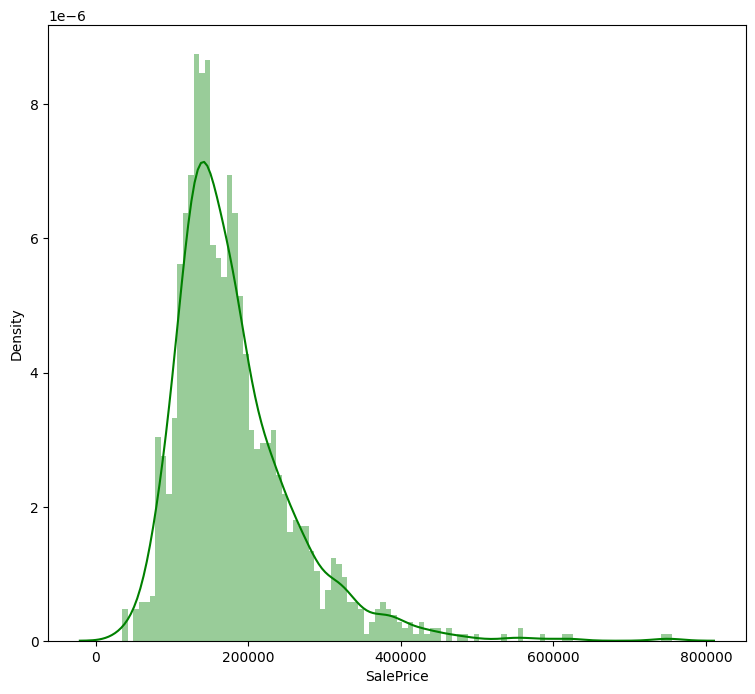

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [ ]:
# Apenas os dados com valores numéricos
numeric_dataset = train.select_dtypes(include = ['float64', 'int64'])
numeric_dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

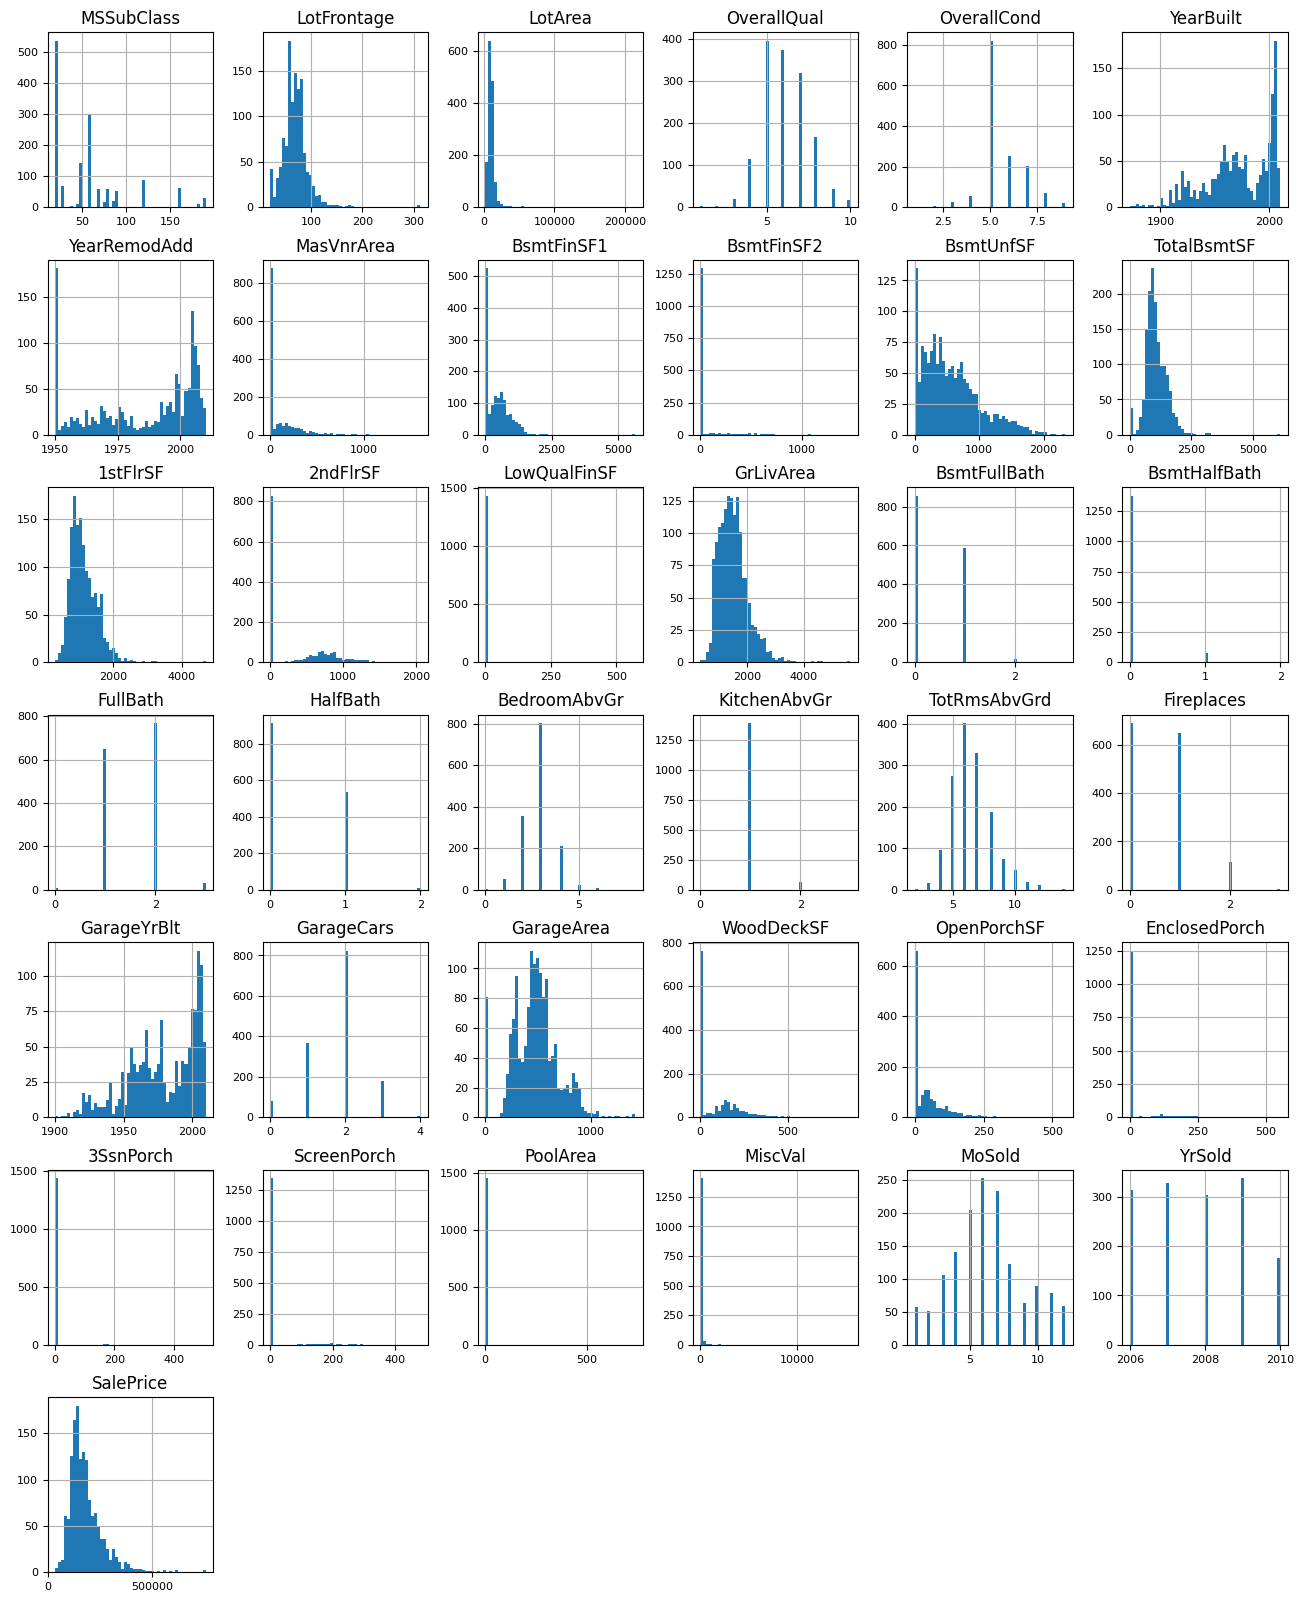

In [10]:
# Plota um gráfico para cada coluna
numeric_dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
import numpy
# Split dataset into training and validation sets
# Not the best way to do it. We'll use an algorithm later
def split_dataset(dataset):
  test_ratio = 0.3
  test_indices = numpy.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_dataset, valid_dataset = split_dataset(train)
print("{} examples in training, {} examples in testing.".format(len(train_dataset), len(valid_dataset)))

1005 examples in training, 455 examples in testing.


In [12]:
# Converte pandas dataset to tensorflow dataset
label = 'SalePrice'
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_dataset, label=label, task=tfdf.keras.Task.REGRESSION)
valid_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(valid_dataset, label=label, task=tfdf.keras.Task.REGRESSION)


2025-08-25 01:08:59.167294: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:

# Modelos disponíveis
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:

tfdf.keras.get_all_models()
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics


Use /tmp/tmp2xnqzzil as temporary training directory


**Treinamento utilizando Random Forest**
Iremos reutilizar esa pare no final do código para comparar com outros métodos e libs

In [15]:
# Training using Random Forest
rf.fit(x=train_dataset)


Reading training dataset...
Training dataset read in 0:00:15.372127. Found 1005 examples.
Training model...


I0000 00:00:1756094955.883951    9752 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1756094955.884509    9752 kernel.cc:783] Collect training examples
I0000 00:00:1756094955.884557    9752 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1756094955.887244    9752 kernel.cc:401] Number of batches: 2
I0000 00:00:1756094955.887307    9752 kernel.cc:402] Number of examples: 1005
I0000 00:00:1756094955.895994    9752 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1756094955.896141    9752 data_spec_inference.cc:354] 2 item(s) have been prun

Model trained in 0:00:03.877792
Compiling model...


I0000 00:00:1756094959.655644    9752 decision_forest.cc:808] Model loaded with 300 root(s), 95722 node(s), and 74 input feature(s).
I0000 00:00:1756094959.659004    9752 abstract_model.cc:1439] Engine "RandomForestOptPred" built
2025-08-25 01:09:19.659128: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [16]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)



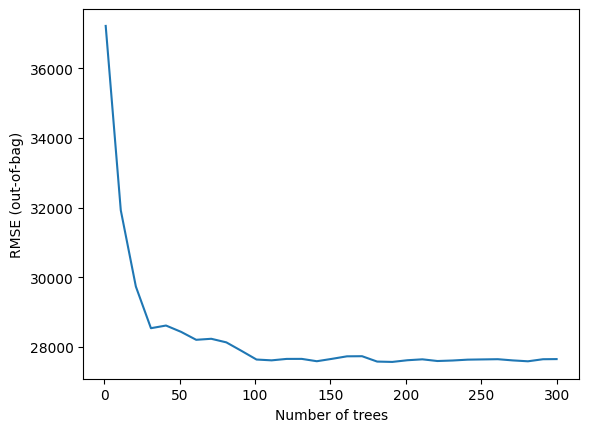

In [17]:
# Antes de treinar, nós separamos manualmente 30% dos dados para validação valid_dataset (Out of bag)
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [18]:
evaluation = rf.evaluate(x=valid_dataset,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - mse: 1080310784.0000
loss: 0.0000
mse: 1080310784.0000


In [19]:
inspector = rf.make_inspector()
print(f"variable_importances disponíveis:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

variable_importances disponíveis:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [20]:
# INV_MEAN_MIN_DEPTH - Inverso da profundidade mínima média: mede o quão próximo da raiz uma variável geralmente aparece em todas as árvores. 
#   Profundidade menor (mais perto da raiz) = maior importância.
inspector.variable_importances()["INV_MEAN_MIN_DEPTH"]
# SUM_SCORE - Soma das melhorias de score: acumula todas as melhorias de score quando a variável é usada para divisões em todas as árvores.
inspector.variable_importances()["SUM_SCORE"]
# NUM_AS_ROOT - Número de vezes como raiz: conta quantas vezes a variável é usada como nó raiz em todas as árvores da floresta.
inspector.variable_importances()["NUM_AS_ROOT"]
# NUM_NODES - Número de nós: conta o total de nós (divisões) que usam essa variável em todas as árvores.
inspector.variable_importances()["NUM_NODES"]

[("Neighborhood" (4; #59), 4111.0),
 ("GrLivArea" (1; #38), 3753.0),
 ("TotalBsmtSF" (1; #73), 2438.0),
 ("GarageArea" (1; #31), 2386.0),
 ("LotArea" (1; #47), 2167.0),
 ("BsmtFinSF1" (1; #8), 1945.0),
 ("1stFlrSF" (1; #0), 1910.0),
 ("BsmtUnfSF" (1; #15), 1684.0),
 ("Exterior2nd" (4; #24), 1626.0),
 ("BsmtFinType1" (4; #10), 1506.0),
 ("YearRemodAdd" (1; #77), 1484.0),
 ("OverallQual" (1; #62), 1369.0),
 ("Exterior1st" (4; #23), 1342.0),
 ("LotFrontage" (1; #49), 1258.0),
 ("OpenPorchSF" (1; #60), 1192.0),
 ("MoSold" (1; #58), 1150.0),
 ("YearBuilt" (1; #76), 1119.0),
 ("2ndFlrSF" (1; #1), 1067.0),
 ("WoodDeckSF" (1; #75), 1050.0),
 ("GarageYrBlt" (1; #37), 974.0),
 ("MasVnrArea" (1; #54), 943.0),
 ("OverallCond" (1; #61), 809.0),
 ("YrSold" (1; #78), 802.0),
 ("HeatingQC" (4; #41), 582.0),
 ("TotRmsAbvGrd" (1; #72), 577.0),
 ("BsmtExposure" (4; #7), 570.0),
 ("GarageFinish" (4; #34), 532.0),
 ("Fireplaces" (1; #27), 425.0),
 ("GarageCars" (1; #32), 414.0),
 ("HouseStyle" (4; #42), 38

In [21]:
# Get model inspector and check data structure
inspector = rf.make_inspector()

# Let's check the structure of importance data
importance_data = inspector.variable_importances()["NUM_AS_ROOT"]
print("Type:", type(importance_data))
print("First few items:")
for i, item in enumerate(importance_data[:5]):
    print(f"  {i}: {item} (type: {type(item)})")
    if hasattr(item, '__dict__'):
        print(f"     attributes: {dir(item)}")

Type: <class 'list'>
First few items:
  0: ("OverallQual" (1; #62), 119.0) (type: <class 'tuple'>)
  1: ("GarageCars" (1; #32), 42.0) (type: <class 'tuple'>)
  2: ("ExterQual" (4; #22), 40.0) (type: <class 'tuple'>)
  3: ("Neighborhood" (4; #59), 28.0) (type: <class 'tuple'>)
  4: ("GrLivArea" (1; #38), 26.0) (type: <class 'tuple'>)


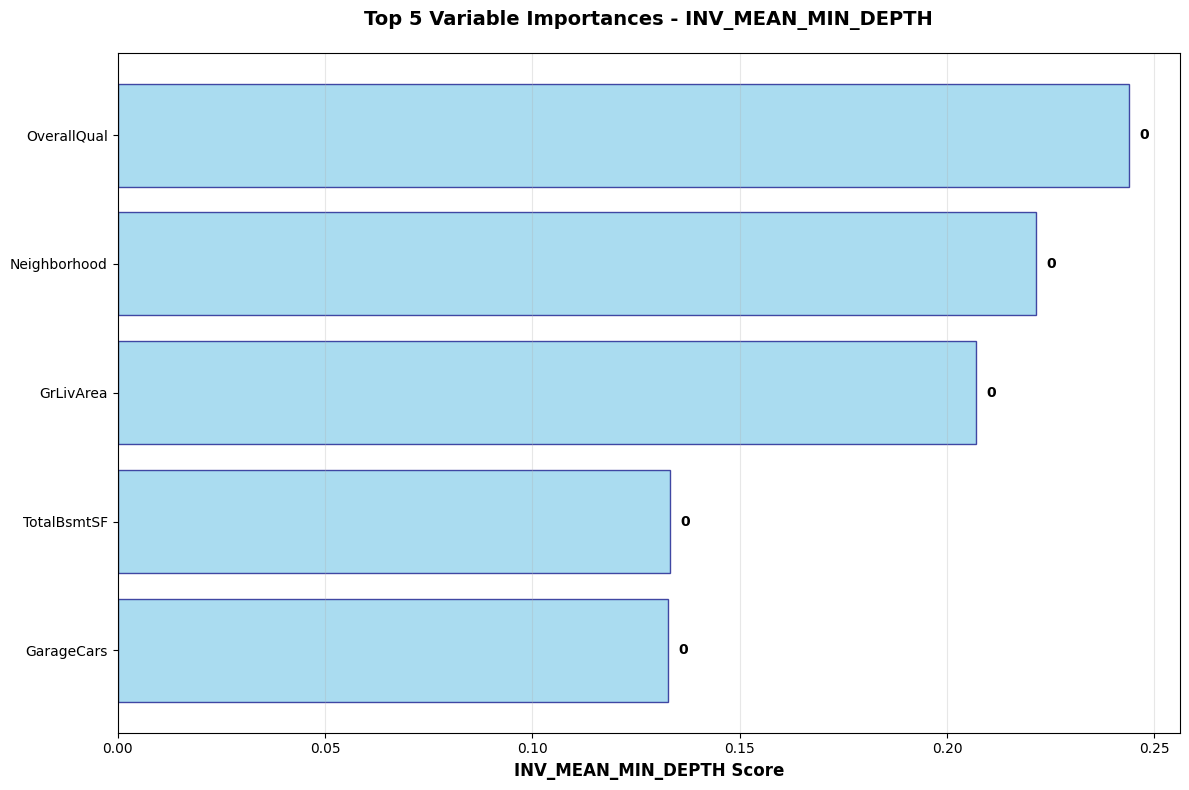

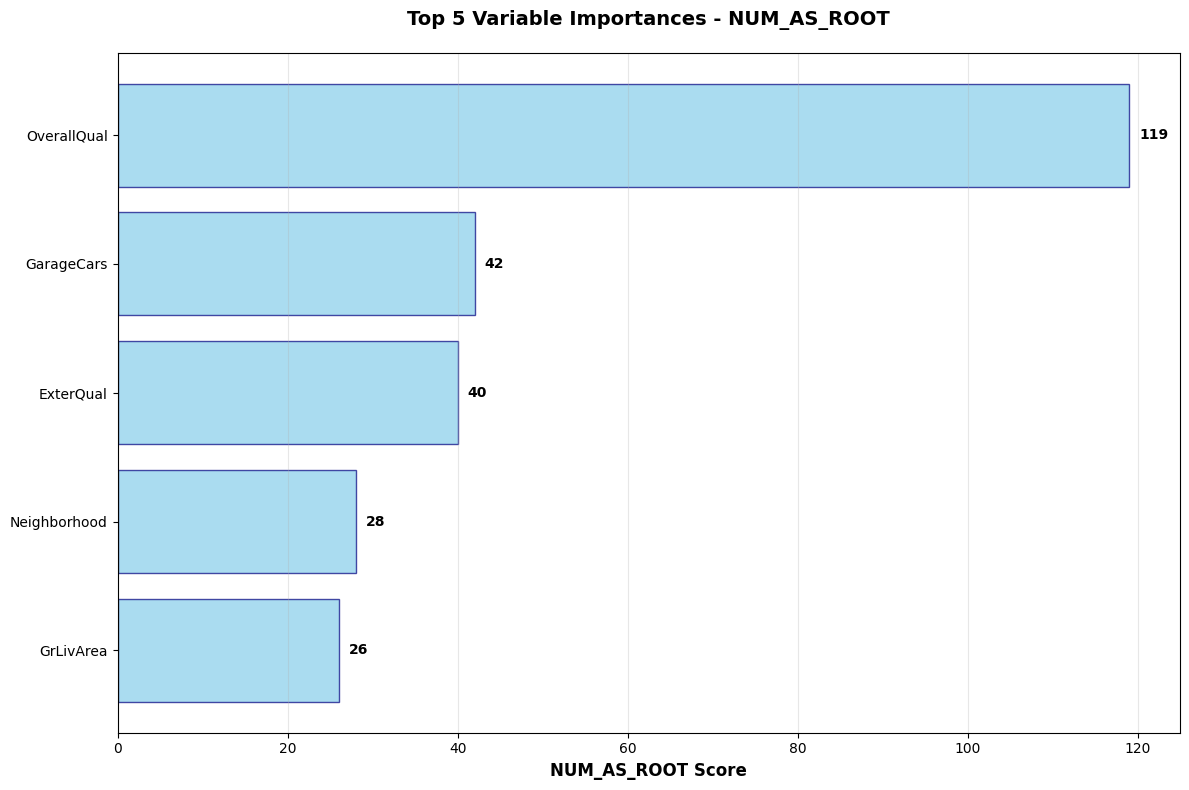

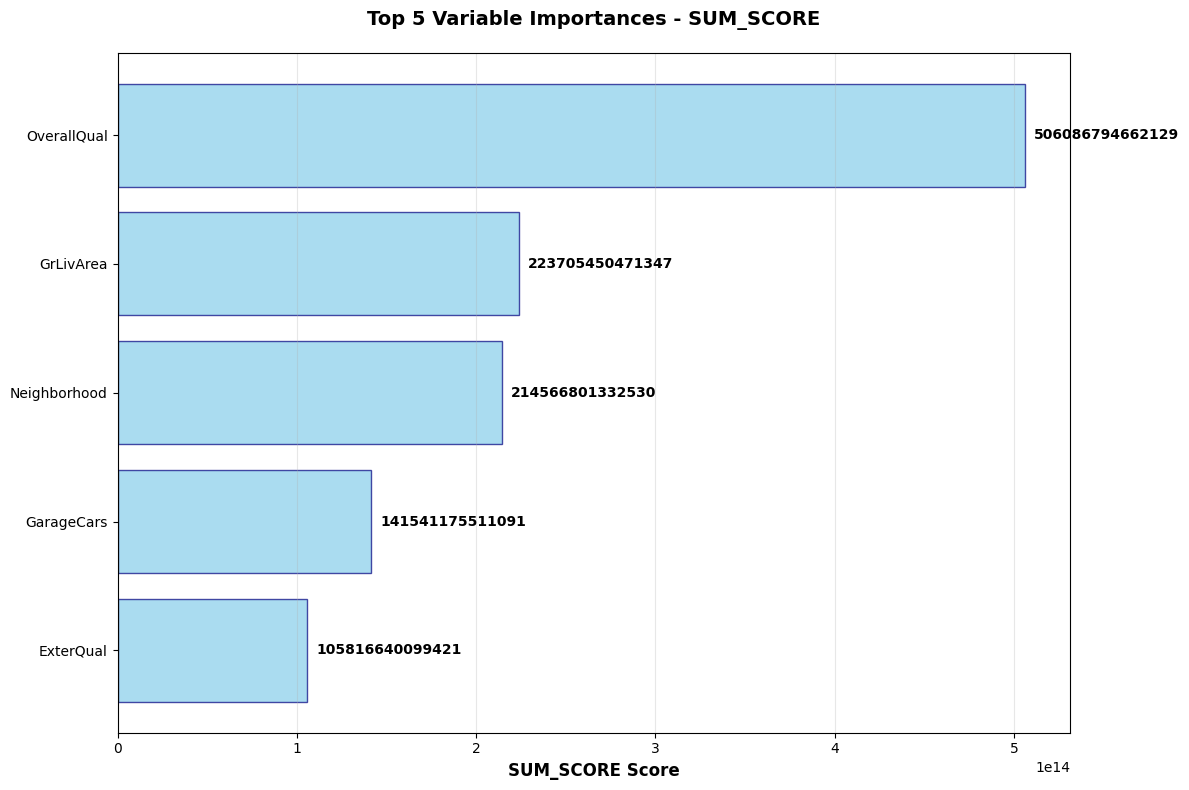

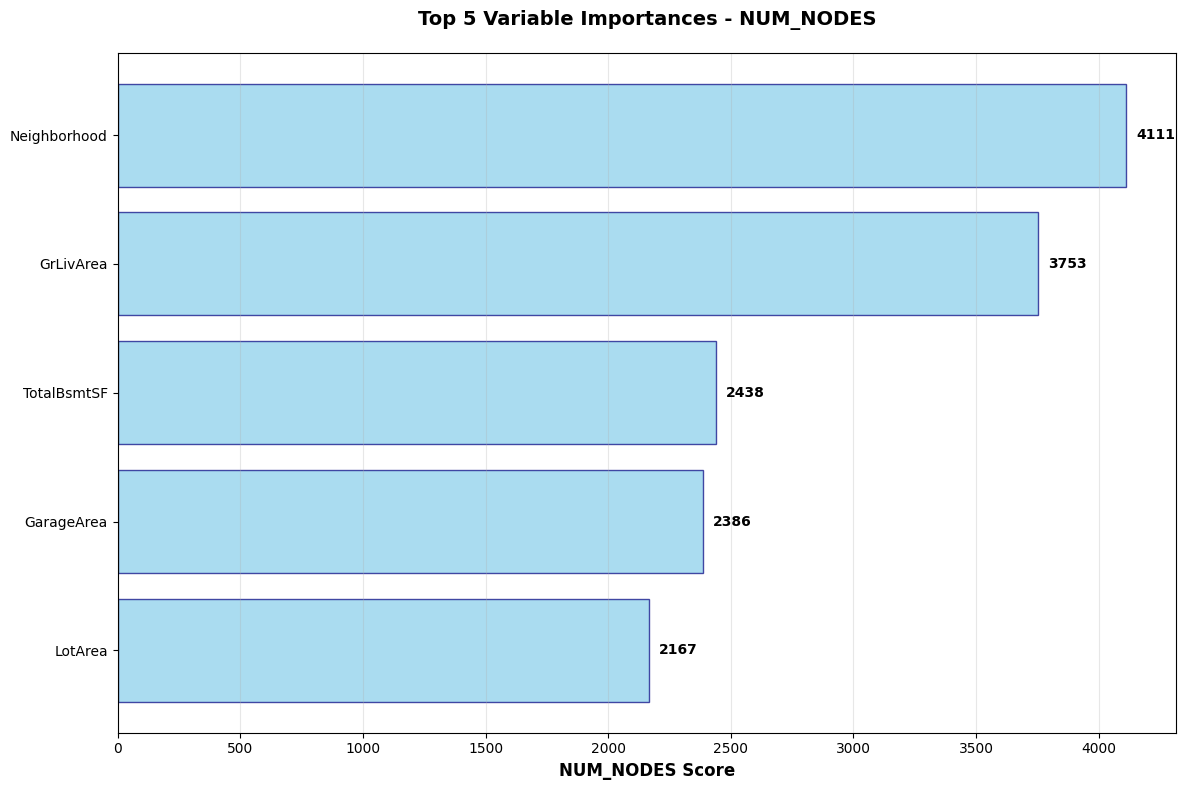

In [ ]:
def plot_variable_importance(importance_data, metric_name, top_n=20, figsize=(12, 8)):
    """
    Creates a horizontal bar chart for variable importance with good UX
    """
    # Handle different data structures
    if hasattr(importance_data[0], 'variable') and hasattr(importance_data[0], 'importance'):
        # TensorFlow Decision Forests format
        variables = [item.variable.name for item in importance_data[:top_n]]
        scores = [item.importance for item in importance_data[:top_n]]
    else:
        # Tuple format (variable_name, score)
        variables = [item[0][0] for item in importance_data[:top_n]]
        scores = [item[1] for item in importance_data[:top_n]]
    
    # Create figure
    plt.figure(figsize=figsize)
    
    # Create horizontal bar plot
    bars = plt.barh(range(len(variables)), scores, color='skyblue', edgecolor='navy', alpha=0.7)
    
    # Customize the plot
    plt.yticks(range(len(variables)), variables)
    plt.xlabel(f'{metric_name} Score', fontsize=12, fontweight='bold')
    plt.title(f'Top {top_n} Variable Importances - {metric_name}', fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, score) in enumerate(zip(bars, scores)):
        plt.text(score + max(scores) * 0.01, i, f'{score:.0f}', 
                va='center', fontsize=10, fontweight='bold')
    
    # Invert y-axis to show highest importance at top
    plt.gca().invert_yaxis()
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    return plt.gcf()

def plot(var_name):
    importance_data = inspector.variable_importances()[var_name]
    plot_variable_importance(importance_data, var_name, top_n=5)
    plt.show()

# TODO: Melhorar vizualização do INV_MEAN_MIN_DEPTH
variables_to_plot =["INV_MEAN_MIN_DEPTH", "NUM_AS_ROOT", "SUM_SCORE", "NUM_NODES"]
for var in variables_to_plot:
    plot(var)

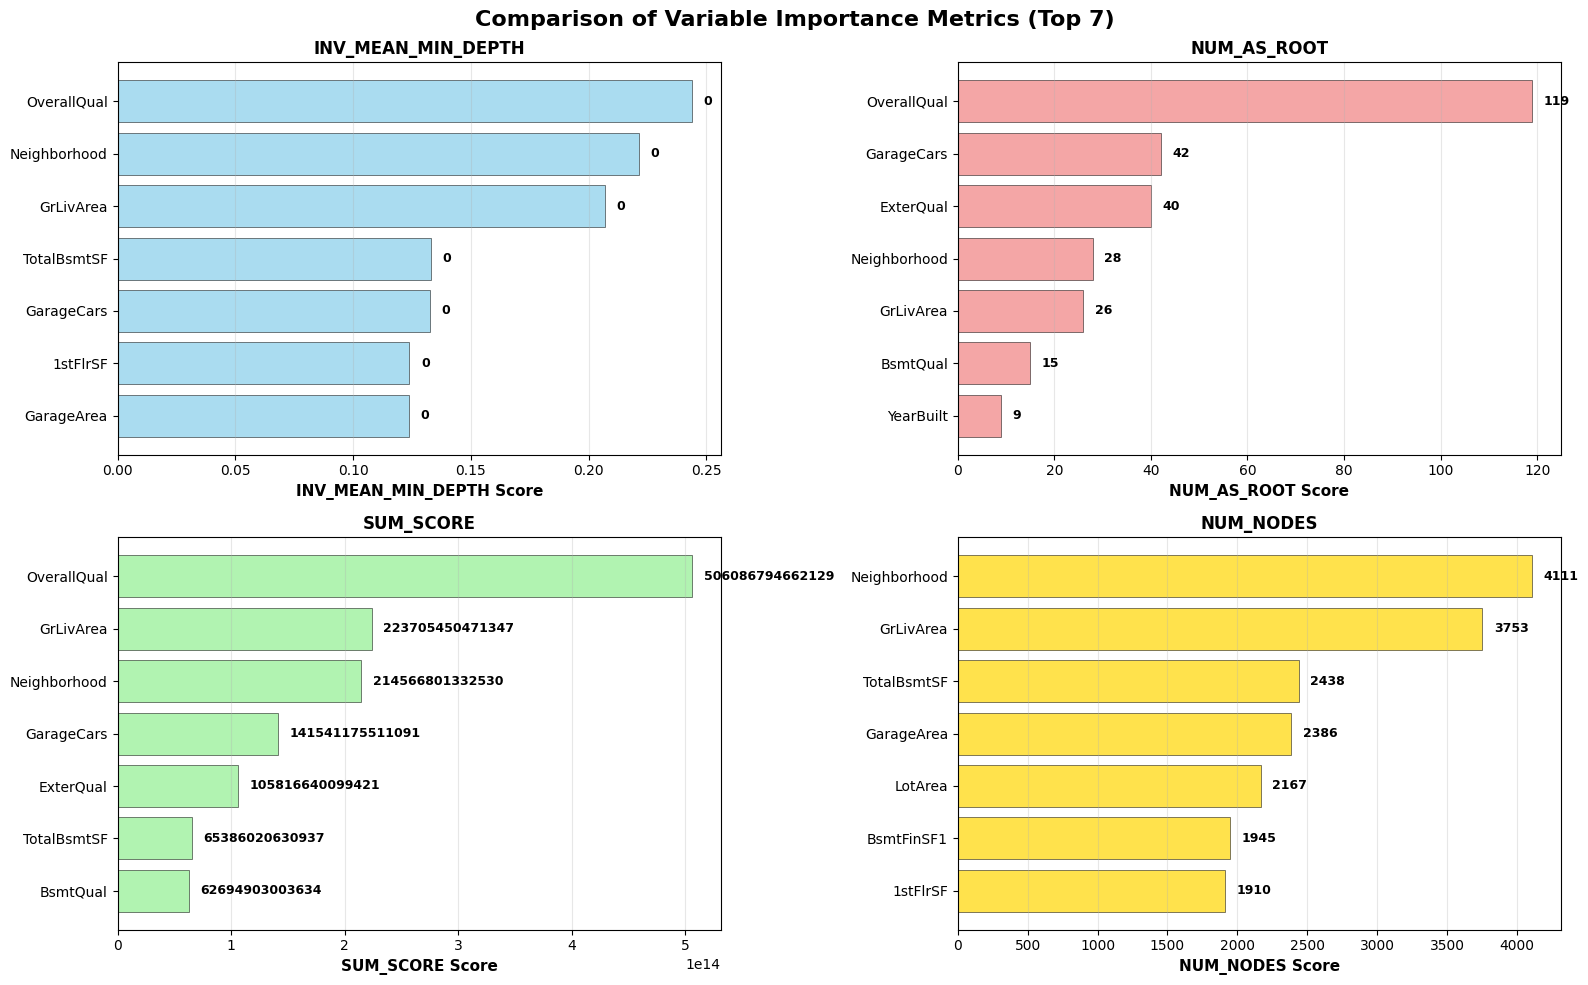

In [32]:
def compare_importance_metrics(inspector, top_n=15, figsize=(16, 10)):
    """
    Compare different importance metrics side by side
    """
    metrics = list(inspector.variable_importances().keys())
    n_metrics = len(metrics)
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()
    
    # Define colors for each metric
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
    
    for i, metric in enumerate(metrics):
        importance_data = inspector.variable_importances()[metric]
        
        # Extract data (handle both data structures)
        if hasattr(importance_data[0], 'variable') and hasattr(importance_data[0], 'importance'):
            variables = [item.variable.name for item in importance_data[:top_n]]
            scores = [item.importance for item in importance_data[:top_n]]
        else:
            variables = [item[0][0] for item in importance_data[:top_n]]
            scores = [item[1] for item in importance_data[:top_n]]
        
        # Plot on subplot
        ax = axes[i]
        bars = ax.barh(range(len(variables)), scores, color=colors[i], 
                      edgecolor='black', alpha=0.7, linewidth=0.5)
        
        # Customize subplot
        ax.set_yticks(range(len(variables)))
        ax.set_yticklabels(variables, fontsize=10)
        ax.set_xlabel(f'{metric} Score', fontsize=11, fontweight='bold')
        ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)
        ax.invert_yaxis()
        
        # Add value labels
        max_score = max(scores) if scores else 1
        for j, (bar, score) in enumerate(zip(bars, scores)):
            ax.text(score + max_score * 0.02, j, f'{score:.0f}', 
                   va='center', fontsize=9, fontweight='bold')
    
    plt.suptitle(f'Comparison of Variable Importance Metrics (Top {top_n})', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    
    return fig

# Compare all importance metrics
compare_importance_metrics(inspector, top_n=7)
plt.show()

In [42]:
final_test_path = "./files/test.csv"
test_data = pd.read_csv(final_test_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 3s 79ms/step


,Id,SalePrice
0,1461,126914.171875
1,1462,153418.187500
2,1463,179802.500000
3,1464,180968.515625
4,1465,190762.562500


In [47]:
sample_submission_df = pd.read_csv('./files/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('./files/submission-random-forest.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 1s 102ms/step


,Id,SalePrice
0,1461,126914.171875
1,1462,153418.187500
2,1463,179802.500000
3,1464,180968.515625
4,1465,190762.562500


### Passo 12

Tratar valores ausentes

In [ ]:
# Passo 12: Tratar dados ausentes
missing_data = train.isnull().sum()
result = missing_data[missing_data > 0].sort_values(ascending=False)
result

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [68]:
# Let's analyze the missing values and their appropriate fill strategies based on data_description.txt

# Features where NA/None means "doesn't have this feature"
na_features = {
    'PoolQC': 'NA',          # NA = No Pool
    'MiscFeature': 'NA',     # NA = None
    'Alley': 'NA',           # NA = No alley access
    'Fence': 'NA',           # NA = No Fence
    'FireplaceQu': 'NA',     # NA = No Fireplace
    'GarageType': 'NA',      # NA = No Garage
    'GarageFinish': 'NA',    # NA = No Garage
    'GarageQual': 'NA',      # NA = No Garage
    'GarageCond': 'NA',      # NA = No Garage
    'BsmtQual': 'NA',        # NA = No Basement
    'BsmtCond': 'NA',        # NA = No Basement
    'BsmtExposure': 'NA',    # NA = No Basement
    'BsmtFinType1': 'NA',    # NA = No Basement
    'BsmtFinType2': 'NA'     # NA = No Basement
}

# Display features that should be filled with 'NA'
for feature, fill_value in na_features.items():
    missing_count = train[feature].isnull().sum()
    display(f"{feature}: {missing_count} valores ausentes -> Preenchendo com '{fill_value}'")

"PoolQC: 1453 valores ausentes -> Preenchendo com 'NA'"

"MiscFeature: 1406 valores ausentes -> Preenchendo com 'NA'"

"Alley: 1369 valores ausentes -> Preenchendo com 'NA'"

"Fence: 1179 valores ausentes -> Preenchendo com 'NA'"

"FireplaceQu: 690 valores ausentes -> Preenchendo com 'NA'"

"GarageType: 81 valores ausentes -> Preenchendo com 'NA'"

"GarageFinish: 81 valores ausentes -> Preenchendo com 'NA'"

"GarageQual: 81 valores ausentes -> Preenchendo com 'NA'"

"GarageCond: 81 valores ausentes -> Preenchendo com 'NA'"

"BsmtQual: 37 valores ausentes -> Preenchendo com 'NA'"

"BsmtCond: 37 valores ausentes -> Preenchendo com 'NA'"

"BsmtExposure: 38 valores ausentes -> Preenchendo com 'NA'"

"BsmtFinType1: 37 valores ausentes -> Preenchendo com 'NA'"

"BsmtFinType2: 38 valores ausentes -> Preenchendo com 'NA'"

In [69]:
# Now let's handle the remaining features with different strategies

# Features that need special handling:
# 1. MasVnrType: should be "None" when missing (no masonry veneer)
# 2. MasVnrArea: should be 0 when MasVnrType is None
# 3. LotFrontage: numerical, should use median or mean (use median to prevent outliers)
# 4. GarageYrBlt: should match YearBuilt when there's a garage, NA when no garage
# 5. Electrical: mode (most common value)

# Check the relationship between MasVnrType and MasVnrArea
masonry_check = train[['MasVnrType', 'MasVnrArea']].isnull()
display("MasVnrType and MasVnrArea missing values:")
display(masonry_check.sum())

'MasVnrType and MasVnrArea missing values:'

MasVnrType    872
MasVnrArea      8
dtype: int64

In [71]:
# Let's examine some patterns in the missing data
# Check GarageYrBlt vs GarageType
garage_check = train[['GarageType', 'GarageYrBlt']].isnull()
display("Garage missing values check:")
display(garage_check.sum())

# Check if houses with no garage have 0 GarageCars and GarageArea
no_garage_mask = train['GarageType'].isnull()
display("Houses with no GarageType - GarageCars and GarageArea values:")
display(train.loc[no_garage_mask, ['GarageCars', 'GarageArea']].describe())

'Garage missing values check:'

GarageType     81
GarageYrBlt    81
dtype: int64

'Houses with no GarageType - GarageCars and GarageArea values:'

,GarageCars,GarageArea
count,81.0,81.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [74]:
# Create a copy of the training data to fill missing values
train_filled = train.copy()

# 1. Fill categorical features where NA means "None" or "Not applicable"
na_features = {
    'PoolQC': 'NA',          
    'MiscFeature': 'NA',     
    'Alley': 'NA',           
    'Fence': 'NA',           
    'FireplaceQu': 'NA',     
    'GarageType': 'NA',      
    'GarageFinish': 'NA',    
    'GarageQual': 'NA',      
    'GarageCond': 'NA',      
    'BsmtQual': 'NA',        
    'BsmtCond': 'NA',        
    'BsmtExposure': 'NA',    
    'BsmtFinType1': 'NA',    
    'BsmtFinType2': 'NA'     
}

for feature, fill_value in na_features.items():
    train_filled[feature] = train_filled[feature].fillna(fill_value)

# 2. Handle MasVnrType - fill with 'None' when missing
train_filled['MasVnrType'] = train_filled['MasVnrType'].fillna('None')

# 3. Handle MasVnrArea - fill with 0 when MasVnrType is None or missing
train_filled['MasVnrArea'] = train_filled['MasVnrArea'].fillna(0)

# 4. Handle GarageYrBlt - for houses with garages, use YearBuilt; for no garage, use 0
garage_missing_mask = train_filled['GarageYrBlt'].isnull()
has_garage_mask = train_filled['GarageType'] != 'NA'
train_filled.loc[garage_missing_mask & has_garage_mask, 'GarageYrBlt'] = train_filled.loc[garage_missing_mask & has_garage_mask, 'YearBuilt']
train_filled.loc[garage_missing_mask & ~has_garage_mask, 'GarageYrBlt'] = 0

# 5. Handle LotFrontage - use median value
display(train_filled['LotFrontage'].describe())
lotfrontage_median = train_filled['LotFrontage'].median()
train_filled['LotFrontage'] = train_filled['LotFrontage'].fillna(lotfrontage_median)

# 6. Handle Electrical - use mode (most common value)
electrical_mode = train_filled['Electrical'].mode()[0]
train_filled['Electrical'] = train_filled['Electrical'].fillna(electrical_mode)

# Check if all missing values are filled
remaining_missing = train_filled.isnull().sum()
remaining_missing[remaining_missing > 0]

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Series([], dtype: int64)

In [75]:
# Verify the filling results
verification_data = {}

# Check some key features to ensure the filling makes sense
verification_data['LotFrontage'] = {
    'median_used': train_filled['LotFrontage'].median(),
    'original_missing': train['LotFrontage'].isnull().sum(),
    'min_value': train_filled['LotFrontage'].min(),
    'max_value': train_filled['LotFrontage'].max()
}

verification_data['Electrical'] = {
    'mode_used': electrical_mode,
    'original_missing': train['Electrical'].isnull().sum(),
    'value_counts': train_filled['Electrical'].value_counts().head()
}

verification_data['MasVnrArea'] = {
    'zeros_filled': (train_filled['MasVnrArea'] == 0).sum(),
    'original_missing': train['MasVnrArea'].isnull().sum(),
    'max_value': train_filled['MasVnrArea'].max()
}

# Show verification results
for feature, data in verification_data.items():
    display(f"=== {feature} Verification ===")
    for key, value in data.items():
        display(f"{key}: {value}")
    display("")

'=== LotFrontage Verification ==='

'median_used: 69.0'

'original_missing: 259'

'min_value: 21.0'

'max_value: 313.0'

''

'=== Electrical Verification ==='

'mode_used: SBrkr'

'original_missing: 1'

'value_counts: Electrical\nSBrkr    1335\nFuseA      94\nFuseF      27\nFuseP       3\nMix         1\nName: count, dtype: int64'

''

'=== MasVnrArea Verification ==='

'zeros_filled: 869'

'original_missing: 8'

'max_value: 1600.0'

''

### Passo 13

Converter variáveis categóricas para numéricas

In [76]:
# First, let's identify all categorical variables
categorical_cols = train_filled.select_dtypes(include=['object']).columns.tolist()
display("Categorical columns found:")
display(categorical_cols)
display(f"Total categorical columns: {len(categorical_cols)}")

'Categorical columns found:'

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

'Total categorical columns: 43'

In [83]:
# Based on data_description.txt, let's categorize variables as ordinal or nominal
# Ordinal variables have a natural order/ranking
# TODO: add more ordinal.
ordinal_vars = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'LotShape': ['Reg','IR1','IR2','IR3']
}

# All other categorical variables are nominal (no natural order)
nominal_vars = [col for col in categorical_cols if col not in ordinal_vars.keys()]

display("Ordinal variables (with natural order):")
display(list(ordinal_vars.keys()))
display(f"Count: {len(ordinal_vars)}")
display("")
display("Nominal variables (no natural order):")
display(nominal_vars)
display(f"Count: {len(nominal_vars)}")

'Ordinal variables (with natural order):'

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'LotShape']

'Count: 18'

''

'Nominal variables (no natural order):'

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

'Count: 25'

In [80]:
# Apply Label Encoding for ordinal variables
train_encoded = train_filled.copy()

# Label encode ordinal variables with proper order
for var, order in ordinal_vars.items():
    # Create a mapping from category to number based on the order
    mapping = {category: idx for idx, category in enumerate(order)}
    train_encoded[var] = train_encoded[var].map(mapping)

display("Label encoding completed for ordinal variables:")
for var in ordinal_vars.keys():
    unique_vals = sorted(train_encoded[var].unique())
    display(f"{var}: {unique_vals}")

'Label encoding completed for ordinal variables:'

'ExterQual: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

'ExterCond: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

'BsmtQual: [np.int64(0), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]'

'BsmtCond: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

'BsmtExposure: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

'BsmtFinType1: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]'

'BsmtFinType2: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]'

'HeatingQC: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

'KitchenQual: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

'Functional: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]'

'FireplaceQu: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]'

'GarageFinish: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]'

'GarageQual: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]'

'GarageCond: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]'

'PavedDrive: [np.int64(0), np.int64(1), np.int64(2)]'

'PoolQC: [np.int64(0), np.int64(1), np.int64(3), np.int64(4)]'

'Fence: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]'

'LotShape: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]'

In [81]:
# Apply One-Hot Encoding for nominal variables
import pandas as pd

# Get dummy variables for nominal variables
train_encoded = pd.get_dummies(train_encoded, columns=nominal_vars, prefix=nominal_vars)

display("One-hot encoding completed for nominal variables.")
display(f"Dataset shape after encoding: {train_encoded.shape}")
display(f"Original shape: {train_filled.shape}")
display(f"New columns added: {train_encoded.shape[1] - train_filled.shape[1]}")

'One-hot encoding completed for nominal variables.'

'Dataset shape after encoding: (1460, 230)'

'Original shape: (1460, 81)'

'New columns added: 149'

In [86]:
# Verify the encoding results
display("=== Encoding Verification ===")

# Check data types
categorical_remaining = train_encoded.select_dtypes(include=['object']).columns
display(f"Categorical columns remaining: {len(categorical_remaining)}")
display(f"Remaining categorical columns: {list(categorical_remaining)}")

# Verify all columns are numeric now
numeric_cols = train_encoded.select_dtypes(include=['int64', 'float64']).columns
display(f"Total numeric columns: {len(numeric_cols)}")

# Check for any missing values
missing_after_encoding = train_encoded.isnull().sum().sum()
display(f"Missing values after encoding: {missing_after_encoding}")

# Show sample of encoded data
display("Sample of encoded dataset (first 5 rows):")
display(train_encoded.iloc[:5])

# Update the main train variable
train = train_encoded.copy()

'=== Encoding Verification ==='

'Categorical columns remaining: 0'

'Remaining categorical columns: []'

'Total numeric columns: 56'

'Missing values after encoding: 0'

'Sample of encoded dataset (first 5 rows):'

,Id,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,0,7,5,2003,2003,196.0,3,2,4,3,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Fal

### Passo 14
Verificar e tratar outliers em variáveis como área total e preço

In [94]:
# Analyze distribution and detect outliers using IQR method for area and price variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr(data, variable_name):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return {
        'variable': variable_name,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'outlier_percentage': (len(outliers) / len(data)) * 100,
        'min_value': data.min(),
        'max_value': data.max(),
        'mean': data.mean(),
        'median': data.median()
    }

# Focus on total area and price variables
area_and_price_vars = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'SalePrice']

# Analyze each variable
outlier_analysis = {}
for var in area_and_price_vars:
    if var in train.columns:
        outlier_analysis[var] = detect_outliers_iqr(train[var], var)

# Display results
for var, analysis in outlier_analysis.items():
    display(f"=== {var} Outlier Analysis ===")
    display(f"Mean: {analysis['mean']:.2f}, Median: {analysis['median']:.2f}")
    display(f"Min: {analysis['min_value']:.2f}, Max: {analysis['max_value']:.2f}")
    display(f"Q1: {analysis['Q1']:.2f}, Q3: {analysis['Q3']:.2f}")
    display(f"IQR bounds: [{analysis['lower_bound']:.2f}, {analysis['upper_bound']:.2f}]")
    display(f"Outliers: {analysis['outlier_count']} ({analysis['outlier_percentage']:.2f}%)")
    display("")

'=== GrLivArea Outlier Analysis ==='

'Mean: 1515.46, Median: 1464.00'

'Min: 334.00, Max: 5642.00'

'Q1: 1129.50, Q3: 1776.75'

'IQR bounds: [158.62, 2747.62]'

'Outliers: 31 (2.12%)'

''

'=== TotalBsmtSF Outlier Analysis ==='

'Mean: 1057.43, Median: 991.50'

'Min: 0.00, Max: 6110.00'

'Q1: 795.75, Q3: 1298.25'

'IQR bounds: [42.00, 2052.00]'

'Outliers: 61 (4.18%)'

''

'=== LotArea Outlier Analysis ==='

'Mean: 10516.83, Median: 9478.50'

'Min: 1300.00, Max: 215245.00'

'Q1: 7553.50, Q3: 11601.50'

'IQR bounds: [1481.50, 17673.50]'

'Outliers: 69 (4.73%)'

''

'=== SalePrice Outlier Analysis ==='

'Mean: 180921.20, Median: 163000.00'

'Min: 34900.00, Max: 755000.00'

'Q1: 129975.00, Q3: 214000.00'

'IQR bounds: [3937.50, 340037.50]'

'Outliers: 61 (4.18%)'

''

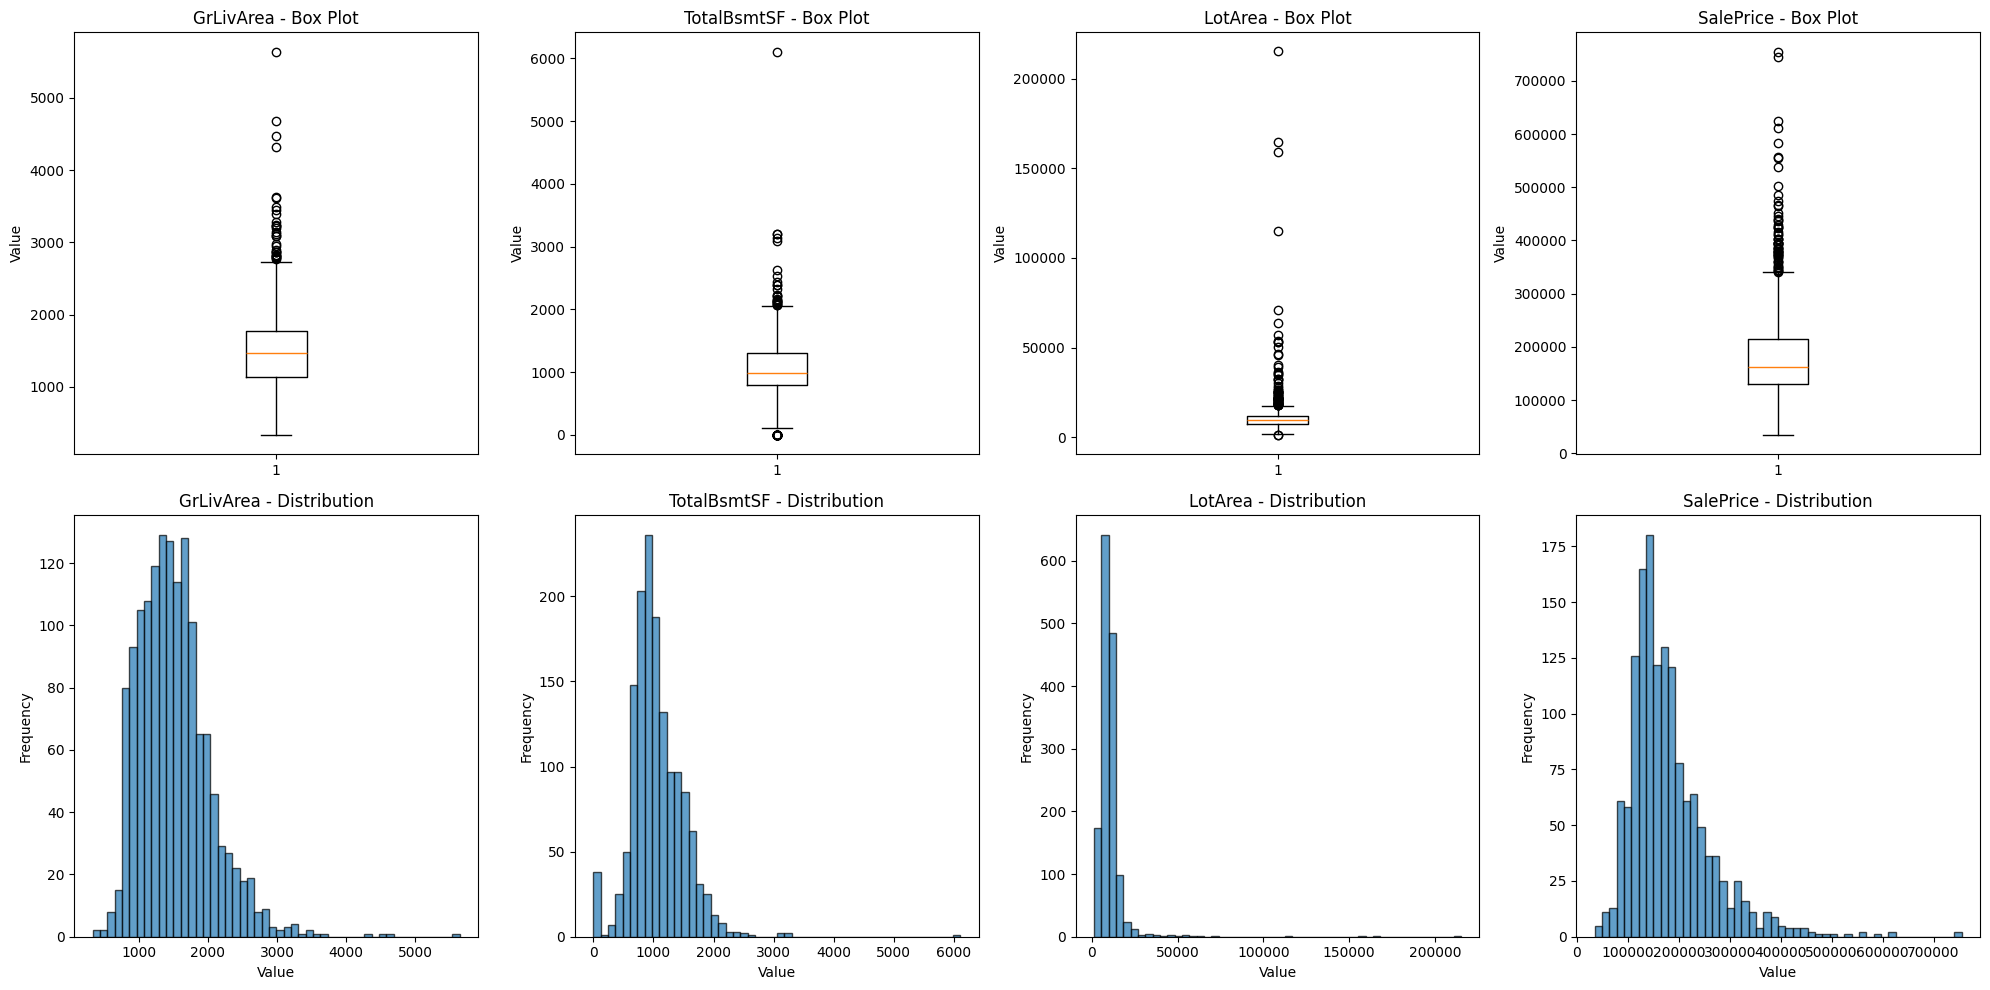

'=== GrLivArea - Top 10 Outliers ==='

array([5642, 4676, 4476, 4316, 3627, 3608, 3493, 3447, 3395, 3279])

''

'=== TotalBsmtSF - Top 10 Outliers ==='

array([6110, 3206, 3200, 3138, 3094, 2633, 2524, 2444, 2396, 2392])

''

'=== LotArea - Top 10 Outliers ==='

array([215245, 164660, 159000, 115149,  70761,  63887,  57200,  53504,
        53227,  53107])

''

'=== SalePrice - Top 10 Outliers ==='

array([755000, 745000, 625000, 611657, 582933, 556581, 555000, 538000,
       501837, 485000])

''

In [95]:
# Create visualizations for outliers
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Variables to visualize
vars_to_plot = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'SalePrice']

for i, var in enumerate(vars_to_plot):
    # Box plot
    axes[i].boxplot(train[var])
    axes[i].set_title(f'{var} - Box Plot')
    axes[i].set_ylabel('Value')
    
    # Histogram
    axes[i+4].hist(train[var], bins=50, alpha=0.7, edgecolor='black')
    axes[i+4].set_title(f'{var} - Distribution')
    axes[i+4].set_xlabel('Value')
    axes[i+4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Show the extreme outliers for each variable
for var in vars_to_plot:
    analysis = outlier_analysis[var]
    outliers_mask = (train[var] < analysis['lower_bound']) | (train[var] > analysis['upper_bound'])
    outliers_data = train[outliers_mask][var].sort_values(ascending=False)
    
    display(f"=== {var} - Top 10 Outliers ===")
    display(outliers_data.head(10).values)
    display("")

In [96]:
# Apply outlier treatment using Winsorization (capping extreme values)
train_outlier_treated = train.copy()

def treat_outliers_winsorization(data, variable, percentile=0.05):
    """
    Treat outliers by capping extreme values at specified percentiles
    """
    lower_percentile = percentile
    upper_percentile = 1 - percentile
    
    lower_cap = data[variable].quantile(lower_percentile)
    upper_cap = data[variable].quantile(upper_percentile)
    
    # Cap the extreme values
    data[variable] = data[variable].clip(lower=lower_cap, upper=upper_cap)
    
    return lower_cap, upper_cap

def treat_outliers_iqr_capping(data, variable):
    """
    Treat outliers by capping values beyond IQR bounds
    """
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    data[variable] = data[variable].clip(lower=lower_bound, upper=upper_bound)
    
    return lower_bound, upper_bound

# Apply different treatment strategies for different variables
treatment_results = {}

# For highly skewed variables like LotArea, use Winsorization
lower_cap, upper_cap = treat_outliers_winsorization(train_outlier_treated, 'LotArea', percentile=0.02)
treatment_results['LotArea'] = {
    'method': 'Winsorization (2% tails)',
    'lower_cap': lower_cap,
    'upper_cap': upper_cap
}

# For moderately skewed variables, use IQR capping
for var in ['GrLivArea', 'TotalBsmtSF']:
    lower_bound, upper_bound = treat_outliers_iqr_capping(train_outlier_treated, var)
    treatment_results[var] = {
        'method': 'IQR Capping',
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# For SalePrice (target variable), be more conservative - use 99th percentile capping
lower_cap, upper_cap = treat_outliers_winsorization(train_outlier_treated, 'SalePrice', percentile=0.005)
treatment_results['SalePrice'] = {
    'method': 'Conservative Winsorization (0.5% tails)',
    'lower_cap': lower_cap,
    'upper_cap': upper_cap
}

# Display treatment results
display("=== Outlier Treatment Results ===")
for var, result in treatment_results.items():
    display(f"{var}:")
    display(f"  Method: {result['method']}")
    if 'lower_cap' in result:
        display(f"  Lower cap: {result['lower_cap']:.2f}")
        display(f"  Upper cap: {result['upper_cap']:.2f}")
    else:
        display(f"  Lower bound: {result['lower_bound']:.2f}")
        display(f"  Upper bound: {result['upper_bound']:.2f}")
    display("")

'=== Outlier Treatment Results ==='

'LotArea:'

'  Method: Winsorization (2% tails)'

'  Lower cap: 2124.74'

'  Upper cap: 25251.62'

''

'GrLivArea:'

'  Method: IQR Capping'

'  Lower bound: 158.62'

'  Upper bound: 2747.62'

''

'TotalBsmtSF:'

'  Method: IQR Capping'

'  Lower bound: 42.00'

'  Upper bound: 2052.00'

''

'SalePrice:'

'  Method: Conservative Winsorization (0.5% tails)'

'  Lower cap: 55000.00'

'  Upper cap: 527331.91'

''

In [97]:
# Verify the outlier treatment results
display("=== Before vs After Treatment Comparison ===")

for var in area_and_price_vars:
    if var in train.columns:
        before_analysis = outlier_analysis[var]
        after_analysis = detect_outliers_iqr(train_outlier_treated[var], var)
        
        display(f"{var}:")
        display(f"  Before treatment - Outliers: {before_analysis['outlier_count']} ({before_analysis['outlier_percentage']:.2f}%)")
        display(f"  After treatment - Outliers: {after_analysis['outlier_count']} ({after_analysis['outlier_percentage']:.2f}%)")
        display(f"  Before - Min: {before_analysis['min_value']:.2f}, Max: {before_analysis['max_value']:.2f}")
        display(f"  After - Min: {after_analysis['min_value']:.2f}, Max: {after_analysis['max_value']:.2f}")
        display("")

# Update the main train dataset with treated outliers
train = train_outlier_treated.copy()
display("✓ Training dataset updated with outlier-treated variables")
display(f"Final dataset shape: {train.shape}")

'=== Before vs After Treatment Comparison ==='

'GrLivArea:'

'  Before treatment - Outliers: 31 (2.12%)'

'  After treatment - Outliers: 0 (0.00%)'

'  Before - Min: 334.00, Max: 5642.00'

'  After - Min: 334.00, Max: 2747.62'

''

'TotalBsmtSF:'

'  Before treatment - Outliers: 61 (4.18%)'

'  After treatment - Outliers: 0 (0.00%)'

'  Before - Min: 0.00, Max: 6110.00'

'  After - Min: 42.00, Max: 2052.00'

''

'LotArea:'

'  Before treatment - Outliers: 69 (4.73%)'

'  After treatment - Outliers: 67 (4.59%)'

'  Before - Min: 1300.00, Max: 215245.00'

'  After - Min: 2124.74, Max: 25251.62'

''

'SalePrice:'

'  Before treatment - Outliers: 61 (4.18%)'

'  After treatment - Outliers: 61 (4.18%)'

'  Before - Min: 34900.00, Max: 755000.00'

'  After - Min: 55000.00, Max: 527331.91'

''

'✓ Training dataset updated with outlier-treated variables'

'Final dataset shape: (1460, 230)'

### Passo 15: Seleção de Features Relevantes
Escolher colunas mais importantes para predição de preços de casas

In [ ]:
# Feature Selection: Choose most relevant columns for house price prediction

# 1. High Importance Features from Previous Random Forest Analysis
# Based on variable importance analysis, select top performing features
high_importance_features = [
    # Area-related features (most important)
    'GrLivArea',        # Above ground living area - top predictor
    'TotalBsmtSF',      # Total basement area
    'LotArea',          # Lot size
    '1stFlrSF',         # First floor area
    'BsmtFinSF1',       # Finished basement area
    'GarageArea',       # Garage area
    '2ndFlrSF',         # Second floor area
    'BsmtUnfSF',        # Unfinished basement area
    
    # Quality and condition features
    'OverallQual',      # Overall quality rating (1-10)
    'OverallCond',      # Overall condition rating
    'ExterQual',        # Exterior quality (encoded)
    'KitchenQual',      # Kitchen quality (encoded)
    'BsmtQual',         # Basement quality (encoded)
    'HeatingQC',        # Heating quality (encoded)
    'GarageQual',       # Garage quality (encoded)
    
    # Age and timing features
    'YearBuilt',        # Original construction year
    'YearRemodAdd',     # Remodel year
    'GarageYrBlt',      # Garage construction year
    'YrSold',           # Year sold
    'MoSold',           # Month sold
    
    # Structural features
    'TotRmsAbvGrd',     # Total rooms above ground
    'Fireplaces',       # Number of fireplaces
    'FullBath',         # Full bathrooms
    'HalfBath',         # Half bathrooms
    'BedroomAbvGr',     # Bedrooms above ground
    'GarageCars',       # Garage capacity
    
    # Basement features
    'BsmtFullBath',     # Basement full bathrooms
    'BsmtExposure',     # Basement exposure (encoded)
    'BsmtFinType1',     # Basement finish type (encoded)
    
    # Other area features
    'WoodDeckSF',       # Wood deck area
    'OpenPorchSF',      # Open porch area
    'MasVnrArea',       # Masonry veneer area
    'LotFrontage',      # Lot frontage
]

display(f"Selected {len(high_importance_features)} high importance features")
display("High importance features:")
for i, feature in enumerate(high_importance_features, 1):
    display(f"{i:2d}. {feature}")

# Check which features exist in our dataset
available_features = [f for f in high_importance_features if f in train.columns]
missing_features = [f for f in high_importance_features if f not in train.columns]

display(f"\nAvailable features: {len(available_features)}")
display(f"Missing features: {len(missing_features)}")
if missing_features:
    display("Missing features:")
    for feature in missing_features:
        display(f"  - {feature}")


### Passo 15

Escolher colunas relevantes

In [102]:
# Feature Selection: Choose most relevant columns for house price prediction

# 1. High Importance Features from Previous Random Forest Analysis
# Based on variable importance analysis, select top performing features
high_importance_features = [
    # Area-related features (most important)
    'GrLivArea',        # Above ground living area - top predictor
    'TotalBsmtSF',      # Total basement area
    'LotArea',          # Lot size
    '1stFlrSF',         # First floor area
    'BsmtFinSF1',       # Finished basement area
    'GarageArea',       # Garage area
    '2ndFlrSF',         # Second floor area
    'BsmtUnfSF',        # Unfinished basement area
    
    # Quality and condition features
    'OverallQual',      # Overall quality rating (1-10)
    'OverallCond',      # Overall condition rating
    'ExterQual',        # Exterior quality (encoded)
    'KitchenQual',      # Kitchen quality (encoded)
    'BsmtQual',         # Basement quality (encoded)
    'HeatingQC',        # Heating quality (encoded)
    'GarageQual',       # Garage quality (encoded)
    
    # Age and timing features
    'YearBuilt',        # Original construction year
    'YearRemodAdd',     # Remodel year
    'GarageYrBlt',      # Garage construction year
    'YrSold',           # Year sold
    'MoSold',           # Month sold
    
    # Structural features
    'TotRmsAbvGrd',     # Total rooms above ground
    'Fireplaces',       # Number of fireplaces
    'FullBath',         # Full bathrooms
    'HalfBath',         # Half bathrooms
    'BedroomAbvGr',     # Bedrooms above ground
    'GarageCars',       # Garage capacity
    
    # Basement features
    'BsmtFullBath',     # Basement full bathrooms
    'BsmtExposure',     # Basement exposure (encoded)
    'BsmtFinType1',     # Basement finish type (encoded)
    
    # Other area features
    'WoodDeckSF',       # Wood deck area
    'OpenPorchSF',      # Open porch area
    'MasVnrArea',       # Masonry veneer area
    'LotFrontage',      # Lot frontage
]

display(f"Selected {len(high_importance_features)} high importance features")
display("High importance features:")
for i, feature in enumerate(high_importance_features, 1):
    display(f"{i:2d}. {feature}")

# Check which features exist in our dataset
available_features = [f for f in high_importance_features if f in train.columns]
missing_features = [f for f in high_importance_features if f not in train.columns]

display(f"\nAvailable features: {len(available_features)}")
display(f"Missing features: {len(missing_features)}")
if missing_features:
    display("Missing features:")
    for feature in missing_features:
        display(f"  - {feature}")

'Selected 33 high importance features'

'High importance features:'

' 1. GrLivArea'

' 2. TotalBsmtSF'

' 3. LotArea'

' 4. 1stFlrSF'

' 5. BsmtFinSF1'

' 6. GarageArea'

' 7. 2ndFlrSF'

' 8. BsmtUnfSF'

' 9. OverallQual'

'10. OverallCond'

'11. ExterQual'

'12. KitchenQual'

'13. BsmtQual'

'14. HeatingQC'

'15. GarageQual'

'16. YearBuilt'

'17. YearRemodAdd'

'18. GarageYrBlt'

'19. YrSold'

'20. MoSold'

'21. TotRmsAbvGrd'

'22. Fireplaces'

'23. FullBath'

'24. HalfBath'

'25. BedroomAbvGr'

'26. GarageCars'

'27. BsmtFullBath'

'28. BsmtExposure'

'29. BsmtFinType1'

'30. WoodDeckSF'

'31. OpenPorchSF'

'32. MasVnrArea'

'33. LotFrontage'

'\nAvailable features: 30'

'Missing features: 3'

'Missing features:'

'  - GarageYrBlt'

'  - TotRmsAbvGrd'

'  - GarageCars'

In [99]:
# 2. Check for highly correlated features to avoid multicollinearity
import numpy as np

# Create correlation matrix for numerical features only
numerical_features = [f for f in available_features if train[f].dtype in ['int64', 'float64']]
correlation_matrix = train[numerical_features].corr()

# Find highly correlated feature pairs (correlation > 0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

display("=== Highly Correlated Feature Pairs (|correlation| > 0.8) ===")
for feature1, feature2, corr in high_corr_pairs:
    display(f"{feature1} <-> {feature2}: {corr:.3f}")

# Remove redundant features from highly correlated pairs
features_to_remove = set()
for feature1, feature2, corr in high_corr_pairs:
    # Keep the feature that appears more important based on domain knowledge
    if feature1 in ['GrLivArea', 'TotalBsmtSF', 'OverallQual'] and feature2 not in ['GrLivArea', 'TotalBsmtSF', 'OverallQual']:
        features_to_remove.add(feature2)
    elif feature2 in ['GrLivArea', 'TotalBsmtSF', 'OverallQual'] and feature1 not in ['GrLivArea', 'TotalBsmtSF', 'OverallQual']:
        features_to_remove.add(feature1)
    else:
        # If both are equally important, remove the second one by default
        features_to_remove.add(feature2)

display(f"\nFeatures to remove due to high correlation: {list(features_to_remove)}")

# Update feature list by removing highly correlated features
final_selected_features = [f for f in available_features if f not in features_to_remove]
display(f"\nFinal selected features after correlation filtering: {len(final_selected_features)}")
for i, feature in enumerate(final_selected_features, 1):
    display(f"{i:2d}. {feature}")

'=== Highly Correlated Feature Pairs (|correlation| > 0.8) ==='

'GrLivArea <-> TotRmsAbvGrd: 0.836'

'GarageArea <-> GarageCars: 0.882'

'GarageQual <-> GarageYrBlt: 0.947'

"\nFeatures to remove due to high correlation: ['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars']"

'\nFinal selected features after correlation filtering: 30'

' 1. GrLivArea'

' 2. TotalBsmtSF'

' 3. LotArea'

' 4. 1stFlrSF'

' 5. BsmtFinSF1'

' 6. GarageArea'

' 7. 2ndFlrSF'

' 8. BsmtUnfSF'

' 9. OverallQual'

'10. OverallCond'

'11. ExterQual'

'12. KitchenQual'

'13. BsmtQual'

'14. HeatingQC'

'15. GarageQual'

'16. YearBuilt'

'17. YearRemodAdd'

'18. YrSold'

'19. MoSold'

'20. Fireplaces'

'21. FullBath'

'22. HalfBath'

'23. BedroomAbvGr'

'24. BsmtFullBath'

'25. BsmtExposure'

'26. BsmtFinType1'

'27. WoodDeckSF'

'28. OpenPorchSF'

'29. MasVnrArea'

'30. LotFrontage'

In [100]:
# 3. Add a few important categorical features (one-hot encoded) based on domain knowledge
# These are known to significantly impact house prices

important_categorical_features = []

# Look for key neighborhood features (if they exist as one-hot encoded)
neighborhood_features = [col for col in train.columns if col.startswith('Neighborhood_')]
if neighborhood_features:
    # Add top neighborhoods that typically have higher prices
    top_neighborhoods = ['Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge']
    for neigh in top_neighborhoods:
        if neigh in train.columns:
            important_categorical_features.append(neigh)

# Foundation type can be important
foundation_features = [col for col in train.columns if col.startswith('Foundation_')]
if 'Foundation_PConc' in train.columns:  # Poured concrete is typically better
    important_categorical_features.append('Foundation_PConc')

# Central air conditioning
if 'CentralAir_Y' in train.columns:
    important_categorical_features.append('CentralAir_Y')

# Garage type
if 'GarageType_Attchd' in train.columns:  # Attached garage typically adds value
    important_categorical_features.append('GarageType_Attchd')

display(f"Selected important categorical features: {len(important_categorical_features)}")
for feature in important_categorical_features:
    display(f"  - {feature}")

# Combine all final features
all_final_features = final_selected_features + important_categorical_features
all_final_features.append('SalePrice')  # Include target variable

display(f"\nTotal final features (including SalePrice): {len(all_final_features)}")

# Create the final dataset with selected features
train_selected = train[all_final_features].copy()

display(f"\nFinal dataset shape: {train_selected.shape}")
display(f"Features selected: {len(all_final_features) - 1} (excluding SalePrice)")
display(f"Reduction from original: {train.shape[1]} -> {train_selected.shape[1]} columns")
display(f"Compression ratio: {(train_selected.shape[1] / train.shape[1] * 100):.1f}%")

# Show some statistics about the selected dataset
display("\n=== Final Selected Dataset Info ===")
display(f"Missing values: {train_selected.isnull().sum().sum()}")
display(f"Memory usage reduction: {train.memory_usage(deep=True).sum() / 1024**2:.1f} MB -> {train_selected.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

'Selected important categorical features: 6'

'  - Neighborhood_StoneBr'

'  - Neighborhood_NridgHt'

'  - Neighborhood_NoRidge'

'  - Foundation_PConc'

'  - CentralAir_Y'

'  - GarageType_Attchd'

'\nTotal final features (including SalePrice): 37'

'\nFinal dataset shape: (1460, 37)'

'Features selected: 36 (excluding SalePrice)'

'Reduction from original: 230 -> 37 columns'

'Compression ratio: 16.1%'

'\n=== Final Selected Dataset Info ==='

'Missing values: 0'

'Memory usage reduction: 0.9 MB -> 0.4 MB'

### Passo 16

Separar os dados em conjuntos de treino e teste

In [104]:
# Split data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
import numpy as np

# Separate features and target
X = train.drop('SalePrice', axis=1)  # Features
y = train['SalePrice']               # Target variable

# Split the data with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=None       # No stratification needed for regression
)

# Display split information
display("=== DATA SPLIT SUMMARY ===")
display(f"Total samples: {len(train)}")
display(f"Training samples: {len(X_train)} ({len(X_train)/len(train)*100:.1f}%)")
display(f"Testing samples: {len(X_test)} ({len(X_test)/len(train)*100:.1f}%)")
display(f"Number of features: {X_train.shape[1]}")

display("\n=== TARGET VARIABLE DISTRIBUTION ===")
display("Training set:")
display(f"  Mean: ${y_train.mean():,.2f}")
display(f"  Median: ${y_train.median():,.2f}")
display(f"  Std: ${y_train.std():,.2f}")
display(f"  Min: ${y_train.min():,.2f}")
display(f"  Max: ${y_train.max():,.2f}")

display("\nTesting set:")
display(f"  Mean: ${y_test.mean():,.2f}")
display(f"  Median: ${y_test.median():,.2f}")
display(f"  Std: ${y_test.std():,.2f}")
display(f"  Min: ${y_test.min():,.2f}")
display(f"  Max: ${y_test.max():,.2f}")

display("\n=== FEATURE SETS SHAPE ===")
display(f"X_train shape: {X_train.shape}")
display(f"X_test shape: {X_test.shape}")
display(f"y_train shape: {y_train.shape}")
display(f"y_test shape: {y_test.shape}")

'=== DATA SPLIT SUMMARY ==='

'Total samples: 1460'

'Training samples: 1168 (80.0%)'

'Testing samples: 292 (20.0%)'

'Number of features: 36'

'\n=== TARGET VARIABLE DISTRIBUTION ==='

'Training set:'

'  Mean: $181,141.14'

'  Median: $165,000.00'

'  Std: $75,241.66'

'  Min: $55,000.00'

'  Max: $527,331.91'

'\nTesting set:'

'  Mean: $177,789.97'

'  Median: $154,150.00'

'  Std: $81,493.14'

'  Min: $55,000.00'

'  Max: $527,331.91'

'\n=== FEATURE SETS SHAPE ==='

'X_train shape: (1168, 36)'

'X_test shape: (292, 36)'

'y_train shape: (1168,)'

'y_test shape: (292,)'

### Passo 17
Treinar os modelos utilizando tensor flow e scikit-learn (Regressão Linear, Random Forest, Gradient Boosting em ambos)